<a href="https://colab.research.google.com/github/kavicastelo/colab/blob/google/fertilizer_soil_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
df = pd.read_csv('/content/sample_data/Fertilizer_Soil_Data.csv')

In [ ]:
# Displaying the first few rows of the dataframe
display(df.head())

,Temperature,Humidity,Rainfall,Soil_pH,Soil_Moisture,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Fertilizer_Amount,Crop_Type,Crop_Yield
0,28.2,65.1,48.3,6.7,25.8,15.3,10.7,20.1,30.5,Wheat,41.2
1,30.5,68.4,46.8,6.9,27.2,16.1,11.2,23.4,34.2,Rice,53.8
2,27.8,63.2,50.5,6.5,24.9,13.7,10.2,19.8,29.7,Corn,31.9
3,31.3,73.2,41.7,6.8,28.7,18.2,13.9,25.2,38.1,Soybean,46.7
4,29.6,67.7,47.2,6.6,26.5,14.6,10.9,22.3,32.6,Barley,38.5


In [ ]:
# Checking dataframe information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        213 non-null    float64
 1   Humidity           213 non-null    float64
 2   Rainfall           213 non-null    float64
 3   Soil_pH            213 non-null    float64
 4   Soil_Moisture      213 non-null    float64
 5   Nitrogen_Level     213 non-null    float64
 6   Phosphorus_Level   213 non-null    float64
 7   Potassium_Level    213 non-null    float64
 8   Fertilizer_Amount  213 non-null    float64
 9   Crop_Type          213 non-null    object 
 10  Crop_Yield         213 non-null    float64
dtypes: float64(10), object(1)
memory usage: 18.4+ KB
None


In [ ]:
# List of factors for analysis
factors = ['Temperature', 'Humidity', 'Rainfall', 'Soil_pH', 'Soil_Moisture', 'Nitrogen_Level',
           'Phosphorus_Level', 'Potassium_Level', 'Fertilizer_Amount', 'Crop_Yield']

In [ ]:
# Converting non-numeric columns to numeric if necessary
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
if not non_numeric_columns.empty:
    df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

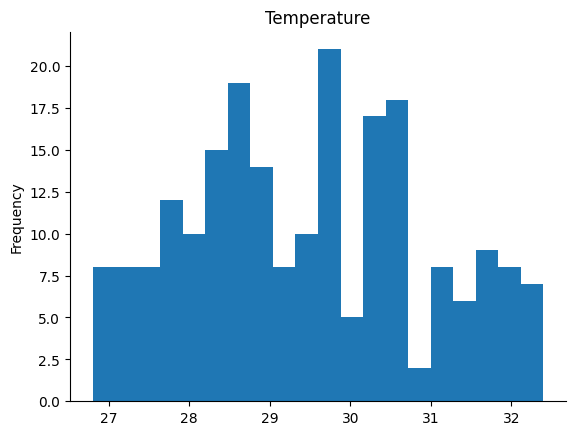

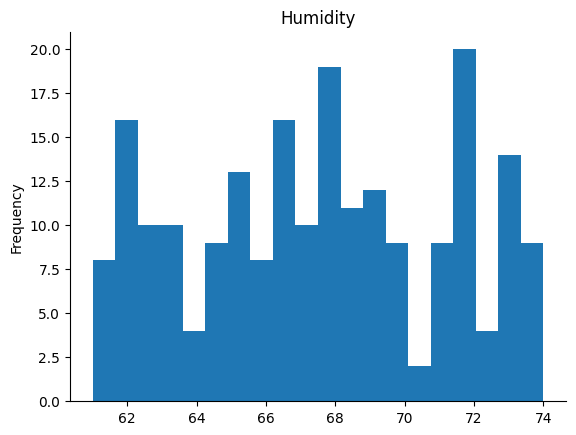

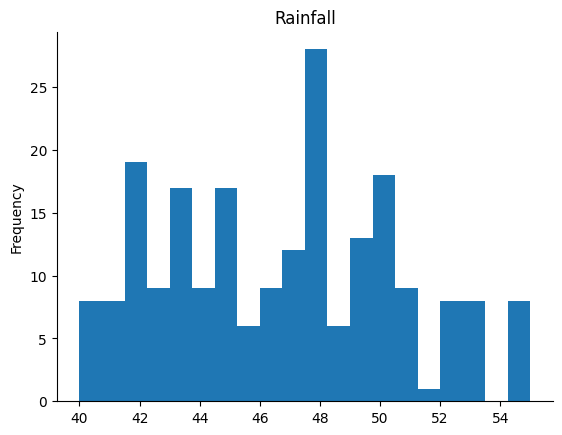

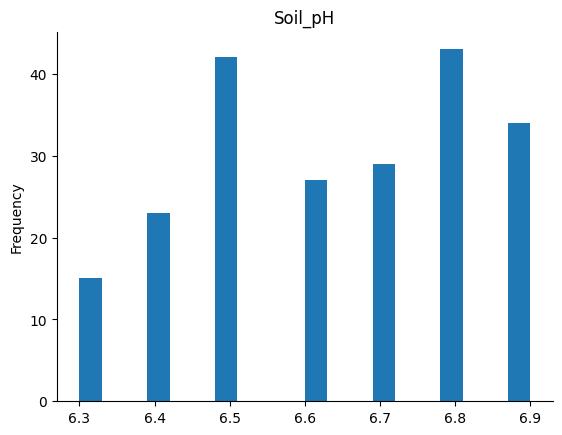

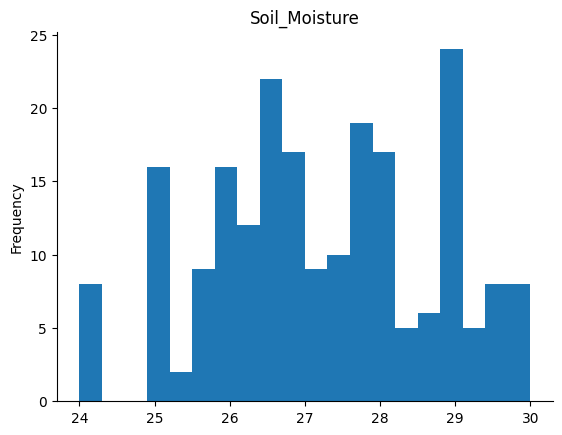

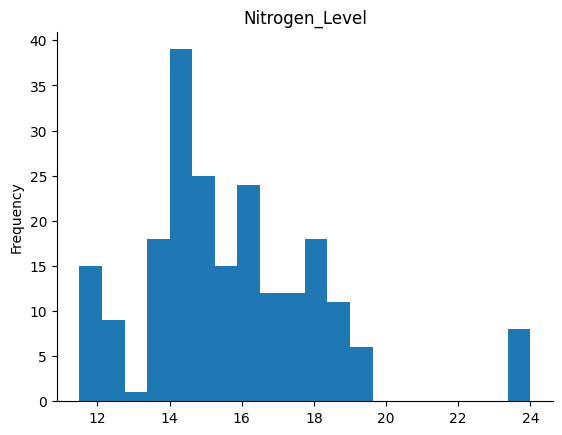

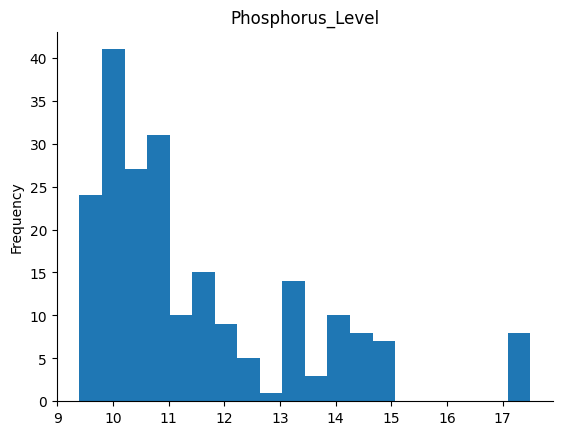

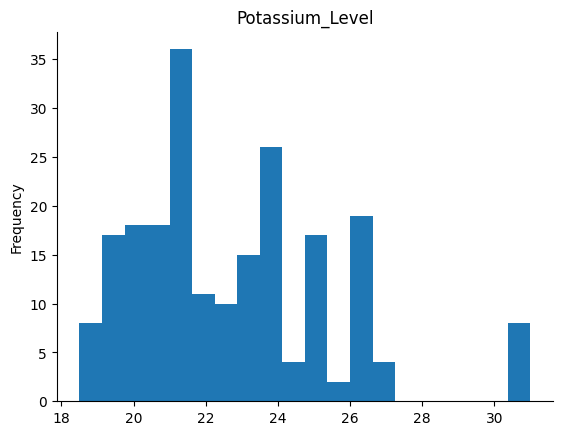

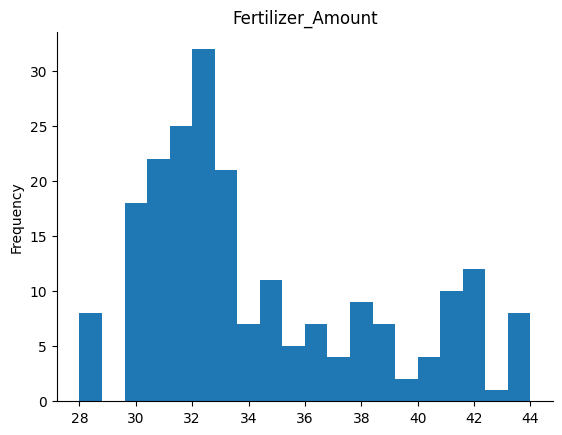

In [ ]:
# Plotting histograms for numeric columns
for factor in factors:
    df[factor].plot(kind='hist', bins=20, title=factor)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()

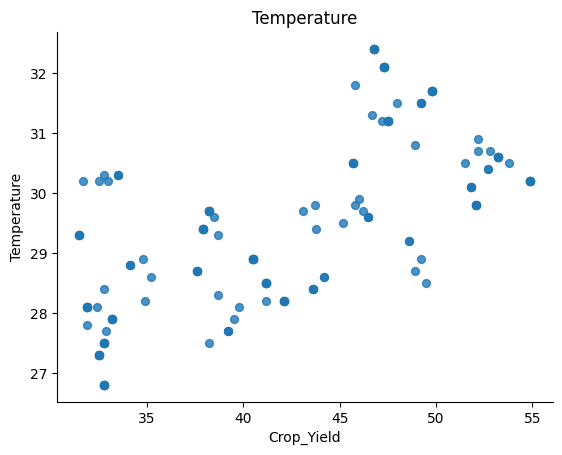

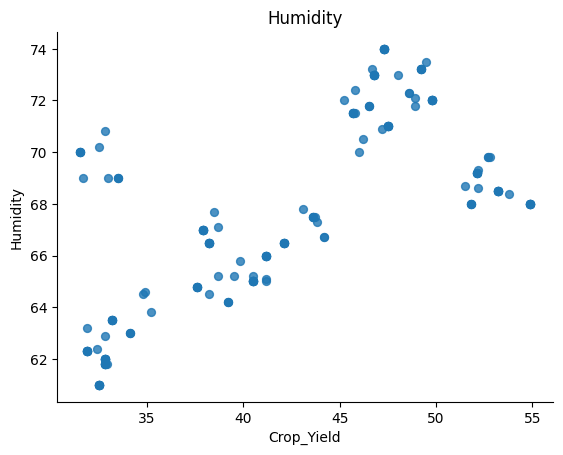

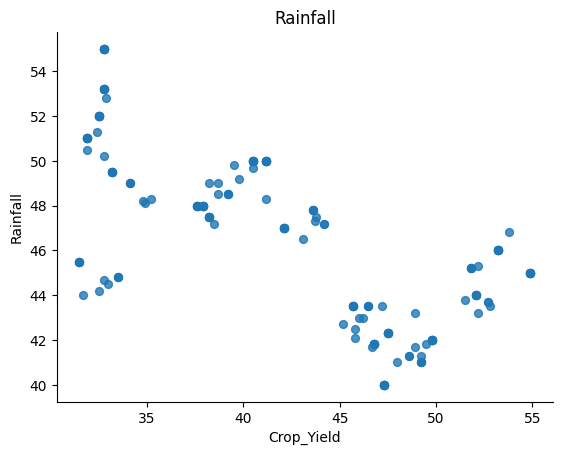

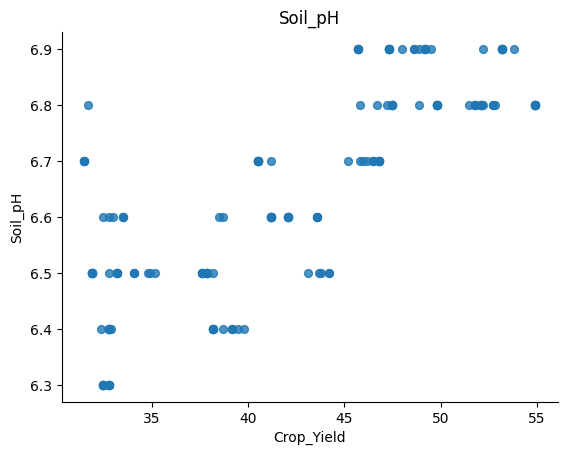

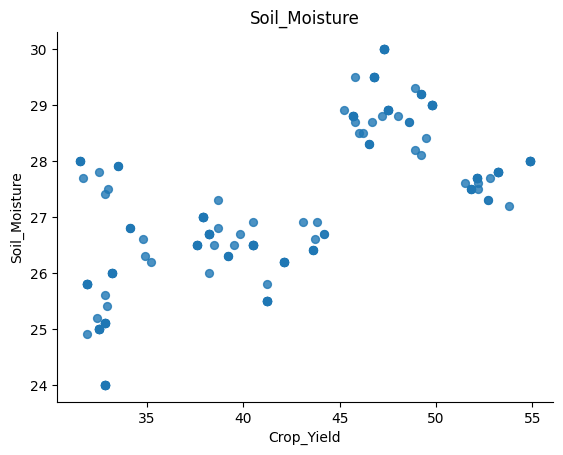

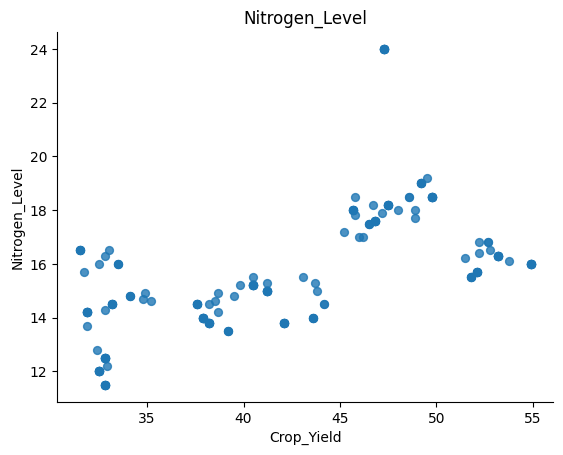

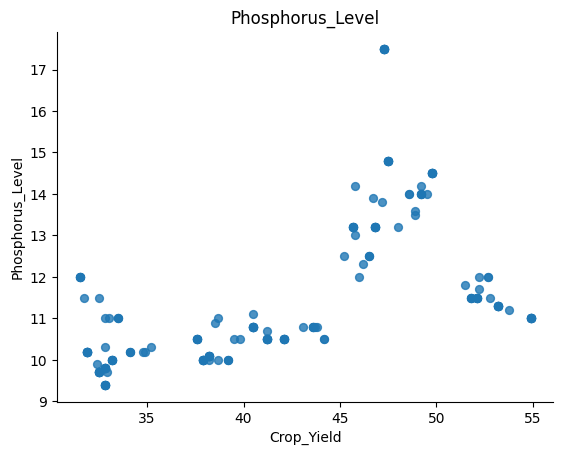

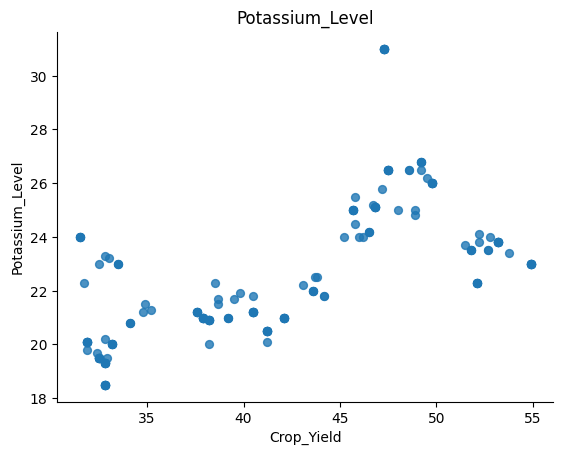

In [ ]:
# Scatter plots before removing duplicates
for factor in factors[:-1]:  # Exclude Crop_Yield
    df.plot(kind='scatter', x='Crop_Yield', y=factor, s=32, alpha=.8, title=factor)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

In [ ]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

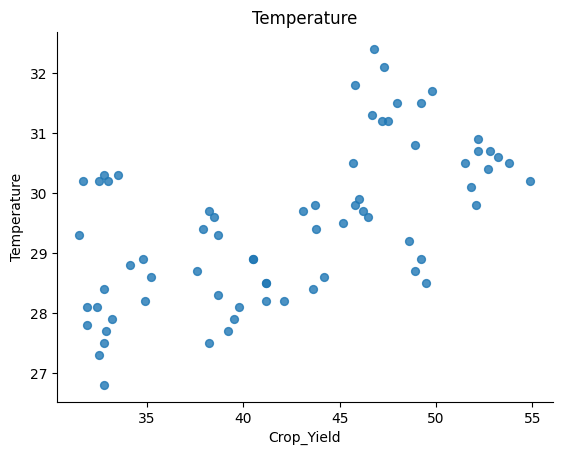

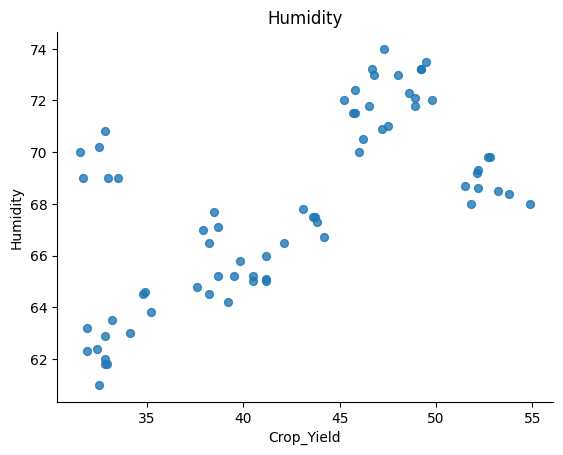

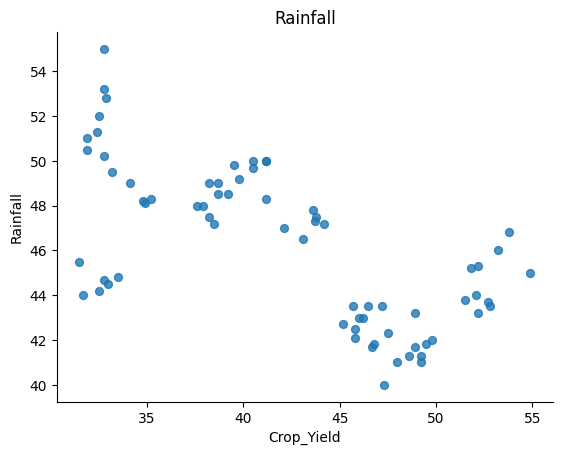

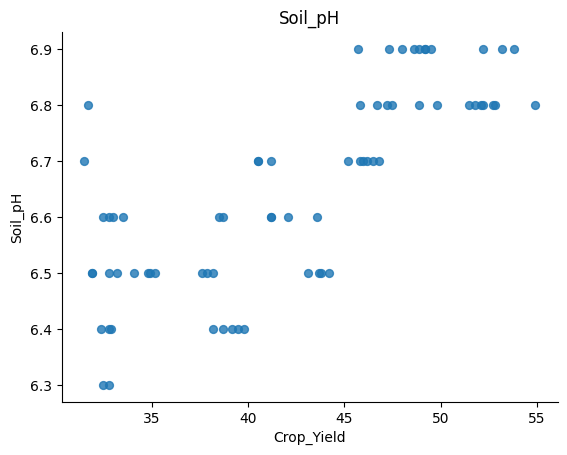

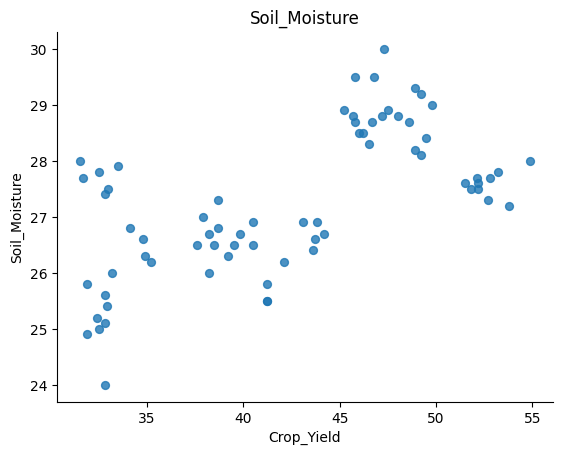

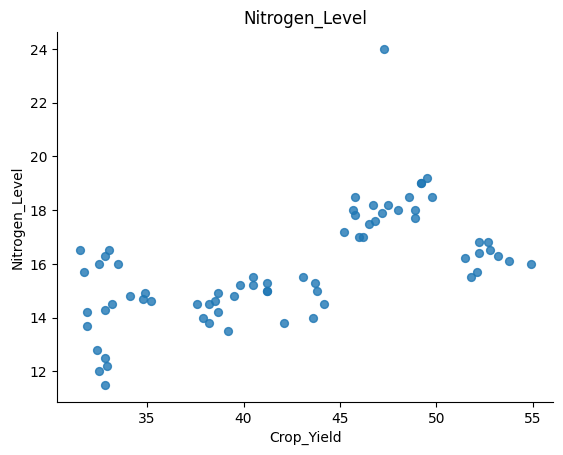

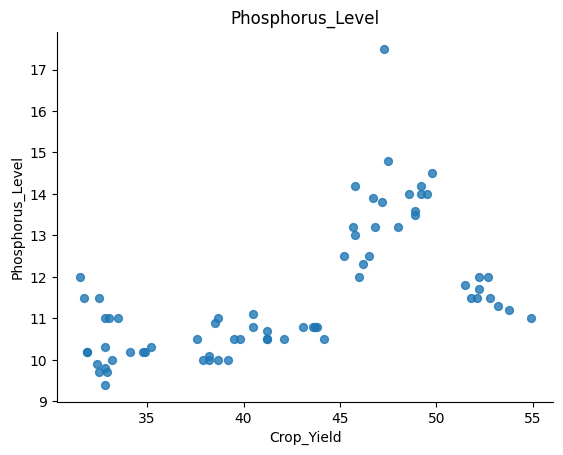

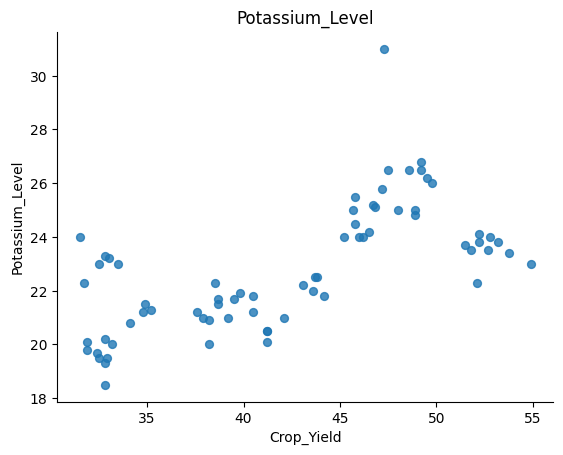

In [ ]:
# Scatter plots after removing duplicates
for factor in factors[:-1]:  # Exclude Crop_Yield
    df.plot(kind='scatter', x='Crop_Yield', y=factor, s=32, alpha=.8, title=factor)
    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.show()

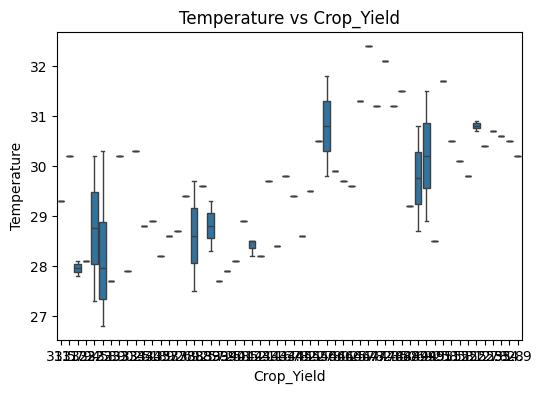

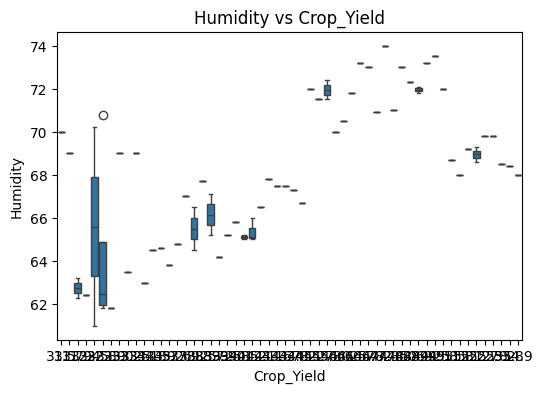

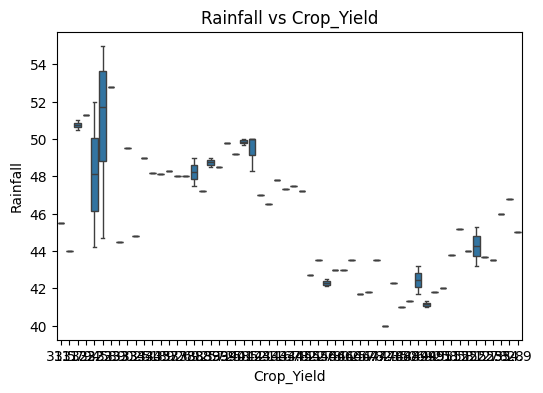

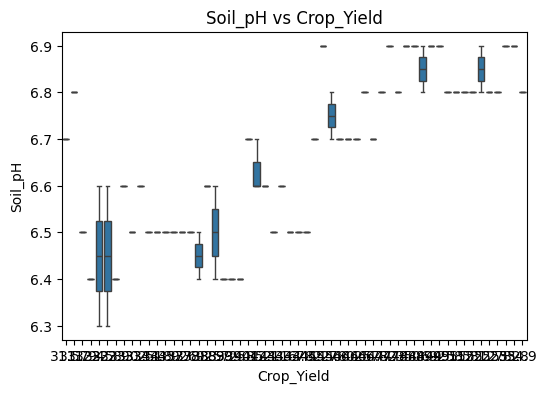

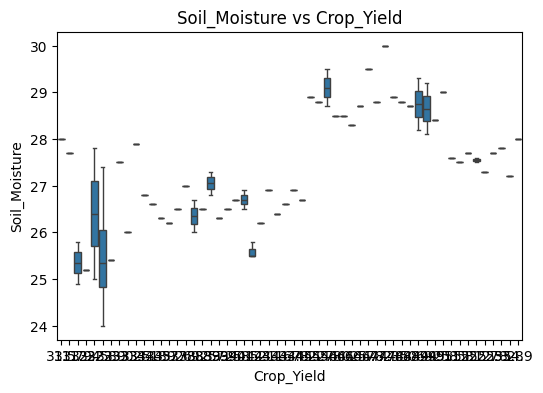

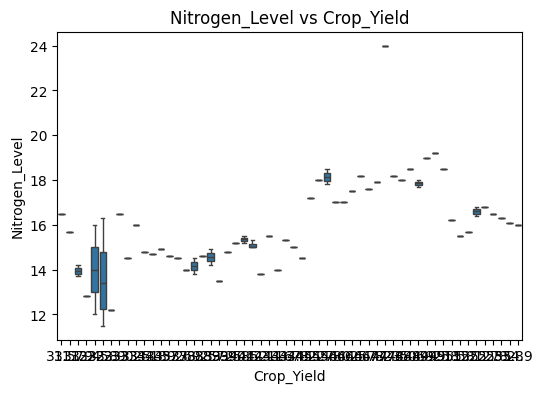

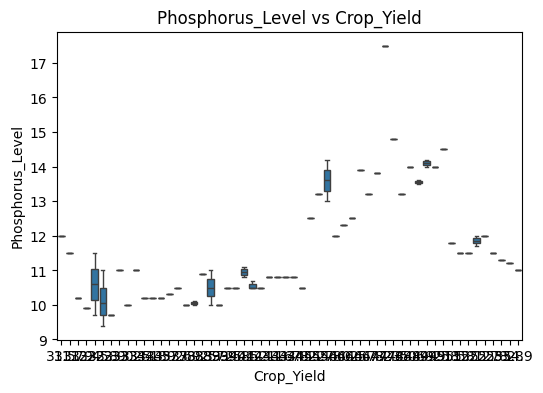

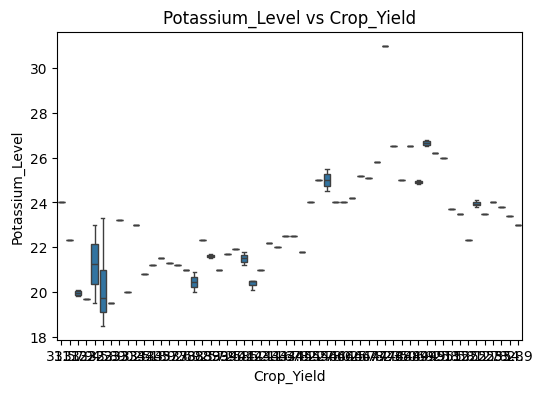

In [ ]:
# Box plots after removing duplicates
for factor in factors[:-1]:  # Exclude Crop_Yield
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Crop_Yield', y=factor, data=df)
    plt.title(factor + ' vs Crop_Yield')
    plt.show()

In [ ]:
# Removing outliers using IQR method
for factor in factors[:-1]:  # Exclude Crop_Yield
    Q1 = df[factor].quantile(0.25)
    Q3 = df[factor].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[factor] < (Q1 - 1.5 * IQR)) | (df[factor] > (Q3 + 1.5 * IQR)))]

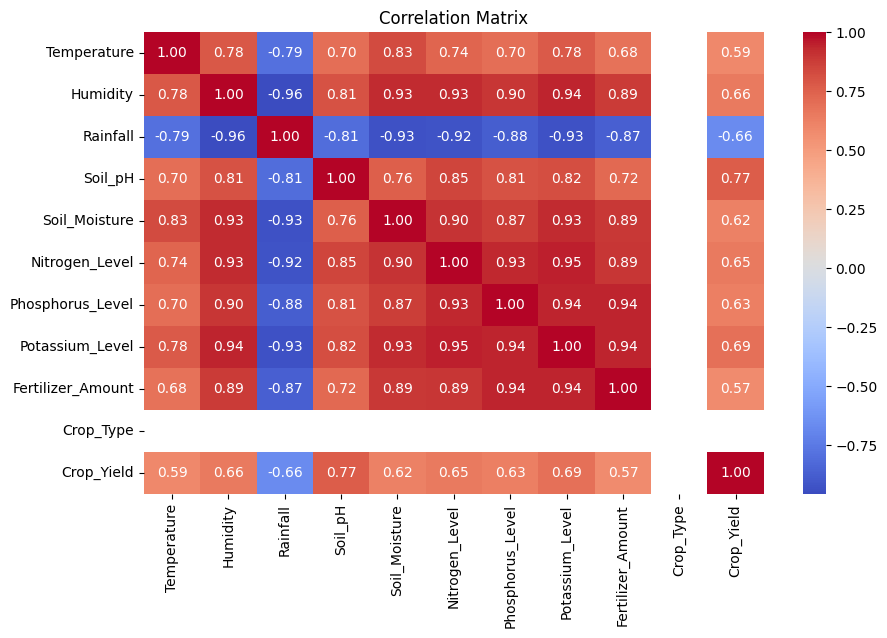

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.to_csv('/content/Data_clean.csv')